<a href="https://colab.research.google.com/github/nish700/ga-learner-dsmp-repo/blob/master/Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Customer Segmentation
##### Customer segmentation lies at the heart of every consumer facing business nowadays which involves being able to identify different types of customers. It's the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

###K-means Clustering
#####K-means is an iterative clustering algorithm where we predefine the number of clusters K and the algorithm iteratively assigns each data point to one of the K clusters based on some measure of distance between the data point and the cluster centroid

###Concepts implemented
##### •	Data Manipulation
##### •	KMeans clustering
##### •	Interpreting clusters with visualization
##### •	Hierarchical Clustering

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading the Data

In [0]:
#Importing the mall dataset with pandas
cust_data= pd.read_csv('/content/customer_data_kMeans.csv')

In [3]:
cust_data.shape

(200, 5)

In [4]:
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
cust_data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
cust_data.groupby('Genre').describe()

CustomerID                              ... Spending Score (1-100)                  
            count        mean        std  min  ...                    25%   50%   75%   max
Genre                                          ...                                         
Female      112.0   97.562500  58.276412  3.0  ...                   35.0  50.0  73.0  99.0
Male         88.0  104.238636  57.483830  1.0  ...                   24.5  50.0  70.0  97.0

[2 rows x 32 columns]

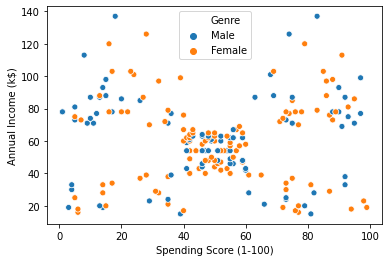

In [7]:
sns.scatterplot(y = 'Annual Income (k$)', x='Spending Score (1-100)', data = cust_data, hue='Genre')

### Create an array

In [0]:
X = cust_data[['Annual Income (k$)','Spending Score (1-100)']].values

### Using the elbow method to find the optimal number of clusters

Text(0, 0.5, 'Loss')

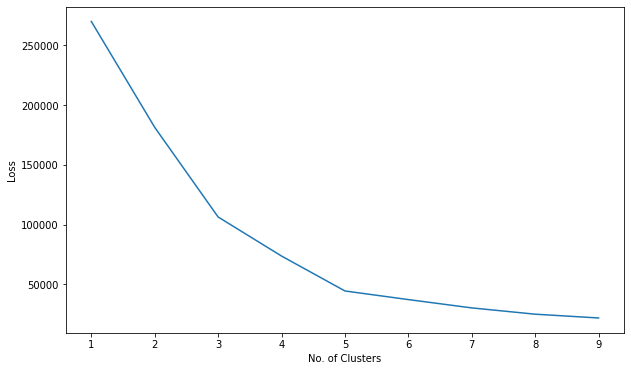

In [9]:
dist = []

for i in range(1,10):
    km = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init=10, random_state=0)
    km.fit(X)
    dist.append(km.inertia_)

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster 
plt.figure(figsize=(10,6))
plt.plot(list(range(1,10)),dist)
plt.xlabel('No. of Clusters')
plt.ylabel('Loss')
#from the graph ,optimum number of clusters is 5

### Applying KMeans to the dataset with the optimal number of cluster(5)

In [0]:
km = KMeans(n_clusters = 5, init='k-means++', max_iter = 300 , n_init=10 , random_state = 4)
km.fit(X)
# cluster center
centroids = km.cluster_centers_
# within cluster sum of square
wcss = km.inertia_

In [11]:
print(centroids)
print(wcss)

[[55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]
44448.45544793371


###creating a predicted label column

In [0]:
cust_data['predicted'] = km.labels_
centroids = pd.DataFrame(centroids, columns =['Annual Income (k$)','Spending Score (1-100)'] )

In [13]:
cust_data['predicted'].value_counts()

0    81
2    39
4    35
1    23
3    22
Name: predicted, dtype: int64

### Visualizing the Clusters in a graph

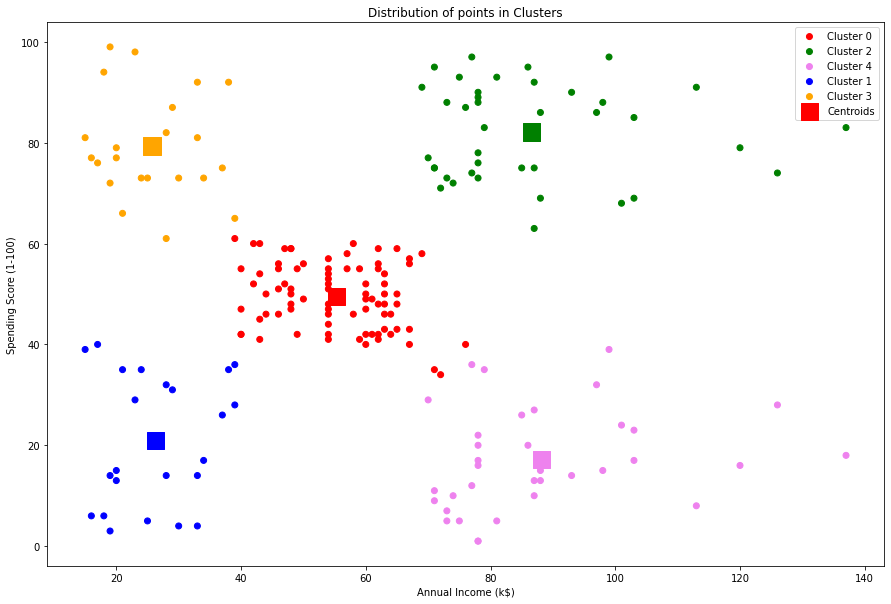

In [55]:
# visualizing
fig, ax = plt.subplots(figsize=(15,10))

#defining the colors
colors = ['red','blue','green','orange','violet']
# mapping the colors to the prediction
cust_data['color'] = cust_data['predicted'].map(lambda p:colors[p])

for i in cust_data['predicted'].value_counts().index.values:
  # plotting the points
  plt.scatter(x = 'Annual Income (k$)',y='Spending Score (1-100)', data= cust_data[cust_data['predicted']==i],c = 'color', label = 'Cluster {}'.format(i))
#plotting the centroids
centroids.plot(kind='scatter',x = 'Annual Income (k$)', y='Spending Score (1-100)',marker='s',c=colors,s=300,ax=ax, label="Centroids")

plt.title("Distribution of points in Clusters")
plt.legend()
plt.show()

#####•	Cluster 0: Medium income and medium annual spend
#####•	Cluster 1: Low income and low annual spend
#####•	Cluster 2: High income and high annual spend
#####•	Cluster 3: Low income and high annual spend
#####•	Cluster 4: High income and low annual spend


### Label encoding the genre column

In [0]:
#initializing the LE object
le = LabelEncoder()
# fitting and transforming the data
cust_data['Genre'] = le.fit_transform(cust_data['Genre'])

In [57]:
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),predicted,color
0,1,1,19,15,39,1,blue
1,2,1,21,15,81,3,orange
2,3,0,20,16,6,1,blue
3,4,0,23,16,77,3,orange
4,5,0,31,17,40,1,blue


###Dendrogram

#### Linkages

In [0]:
Z = linkage(cust_data.drop(['color','predicted','CustomerID'],axis=1),'single')

#### Plotting the Dendrogram

Text(0.5, 1.0, 'Dendrogram')

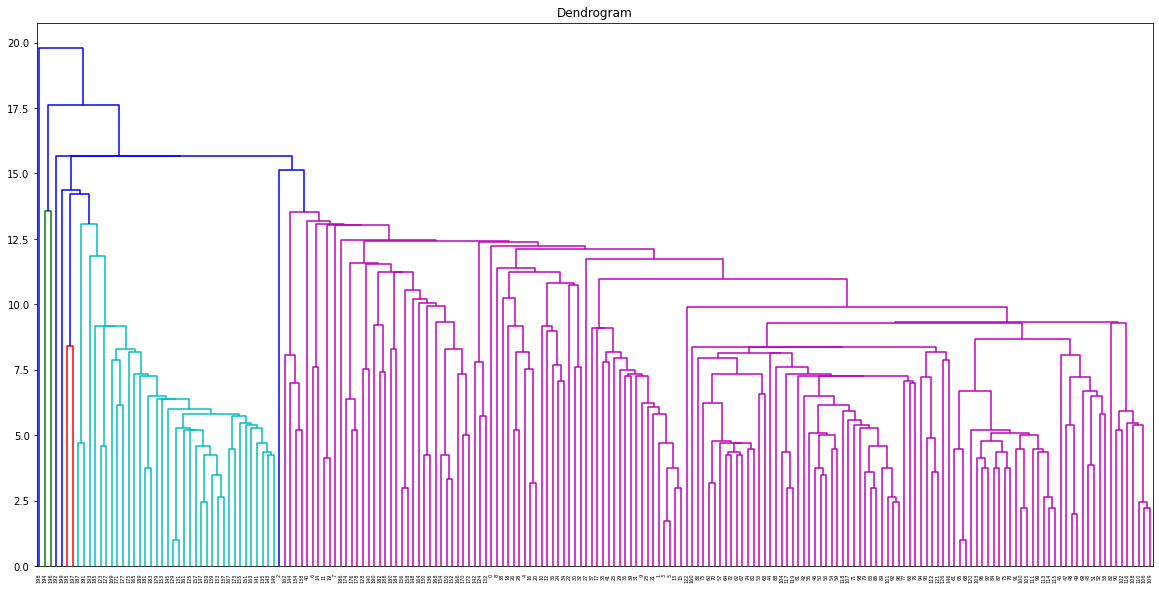

In [60]:
plt.figure(figsize=(20,10))
dn = dendrogram(Z)
plt.xticks(rotation=90)
plt.title('Dendrogram')

####  improve the color scheme and use both vertical and horizontal orientations

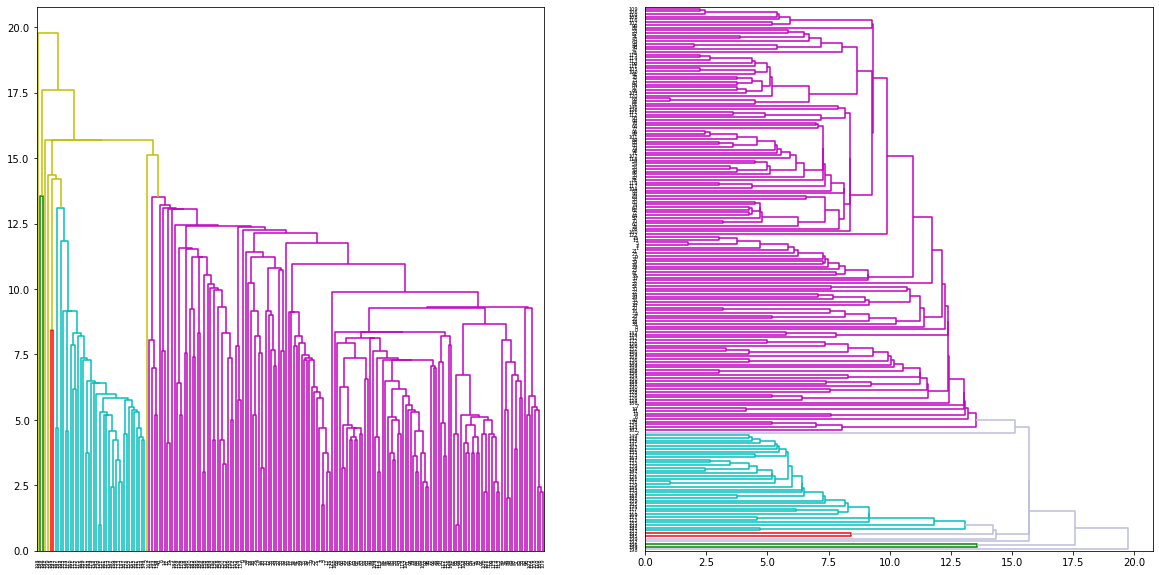

In [61]:
fig, axes = plt.subplots(1,2,figsize=(20,10))

dn1 = dendrogram(Z,ax = axes[0],above_threshold_color='y',orientation='top')
dn2 = dendrogram(Z , ax = axes[1], above_threshold_color='#bcbddc' , orientation ='right')

plt.show()